In [1]:
import fitz  
import re
from collections import defaultdict
import matplotlib.pyplot as plt


file_path = '2021-AL-GEN.pdf'
doc = fitz.open(file_path)


text = ''
for page in doc:
    text += page.get_text()

text[:1000]  


'2021 RESULTS: GENERAL CERTIFICATE OF EDUCATION EXAMINATION - ADVANCED LEVEL\n2021 GCE RESULTS\nCentre No:  11001 BUEA EXTERNAL  \nRegist: 252, Sat for 2 or more Subjects: 231, Passed : 83\n% Passed : 35.93, Sanctioned : 6\nResults of Successful Candidates In Order Of Merit\nPassed In 4 Subjects: 4\nNJIAH LESLIE TAAL ECO-E,ENG-E,GEO-B,HIS-B\n(1)\nAWAH CLARIS LIKOWO NANYONGO \nBIO-E,FSN-B,GGY-E,REL-C\n(2)\nSHELY LAKEH ENG-C,HIS-D,ICT-E,LIT-E\n(3)\nRIMU MICAH NSAKOUM ECO-E,GEO-E,HIS-D,REL-E\n(4)\nPassed In 3 Subjects: 30\nNZELLE SOLANGE NDELLE ECO-C,GEO-B,HIS-B\n(1)\nMESOE REGINA LEKAM ECO-C,GEO-C,HIS-B\n(2)\nBERI MARION WEPNGONG ECO-C,GEO-D,HIS-B\n(3)\nMACNISSI UDUBE AKUBUIRO ENG-D,HIS-B,REL-D\n(4)\nTANGOU FORSO  DIEUNEDORT ECO-E,HIS-B,PHI-C\n(5)\nACHA LAMBART NKEMLEKE ECO-C,GEO-D,HIS-C\n(6)\nITUA BRANDON NGOE ECO-B,GEO-E,PMS-D\n(7)\nAPANDE MERCY MPODE ENG-E,FSN-A,LIT-E\n(8)\nLILIAN NGUM-WAN TATA ENG-C,FRE-D,LIT-D\n(9)\nRAZZAQ NTONGNUI KWAMBE ENG-E,HIS-C,REL-D\n(10)\nATEH MAC-CLIFF SUCC

In [2]:
grade_to_points = {
    'A': 5,
    'B': 4,
    'C': 3,
    'D': 2,
    'E': 1
}

pattern = re.compile(r'([A-Z\s]+)\s*([A-Z]{3,5}-[A-E](?:,\s*[A-Z]{3,5}-[A-E])*)\s*\(\d+\)')

class Record:
    def __init__(self, record):
        self.name, self.grades = sanitize_record(record)
        self.points = calculate_points(self.grades)
    
    def __repr__(self):
        # return f"{self.name}: {self.points} points -> {self.grades}"
        return f"{self.points} points -> {self.grades}"
    
    def __str__(self) -> str:
        return self.__repr__()

class GradeDist:
    def __init__(self) -> None:
        self.names = []
        self.count = 0
    
    def add(self, name):
        self.names.append(name)
        self.count += 1
    
    def __str__(self) -> str:
        return f"{self.count}"  
    
    def __repr__(self) -> str:
        return f"{self.count}"

def calculate_points(grades):
    total_points = 0
    for grade in grades.values():
        total_points += grade_to_points[grade]
    return total_points

def sanitize_record(record):
    name, grades_str = record
    grades = {}
    for t_grade in grades_str.split(','):
        if "-" not in t_grade:
            continue
        subject, grade = t_grade.split('-')
        subject = subject.split("\n")[-1]
        grades[subject.strip()] = grade.strip()

    return name.strip(), grades


def return_first_n_chars_or_fill_with_spaces(text):
    n = 30
    return text[:n] + " " * (n - len(text[:n]))

In [3]:
candidates = pattern.findall(text)
dict_candidates = { candidate[0].strip(): Record(candidate) for candidate in candidates }
grade_distribution = defaultdict(GradeDist)
# Summary of candidates
print(f"Total number of candidates: {len(dict_candidates)}")

Total number of candidates: 33415


In [4]:
[candidate for candidate in candidates if candidate[0].strip() == "NJOME MUNSHE MOKAKE"]

[]

In [5]:
def top_n_percent(grade_distribution, grade):
    total_candidates = len(dict_candidates)
    candidates_considered = 0
    while grade <= 25:
        candidates_considered += grade_distribution[grade].count
        grade += 1
    return candidates_considered / total_candidates * 100

In [6]:


for ind, candidate in enumerate(dict_candidates):
    if ind == 10:
        break
    print(candidate, dict_candidates[candidate])

NJIAH LESLIE TAAL 10 points -> {'ECO': 'E', 'ENG': 'E', 'GEO': 'B', 'HIS': 'B'}
AWAH CLARIS LIKOWO NANYONGO 9 points -> {'BIO': 'E', 'FSN': 'B', 'GGY': 'E', 'REL': 'C'}
SHELY LAKEH 7 points -> {'ENG': 'C', 'HIS': 'D', 'ICT': 'E', 'LIT': 'E'}
RIMU MICAH NSAKOUM 5 points -> {'ECO': 'E', 'GEO': 'E', 'HIS': 'D', 'REL': 'E'}
NZELLE SOLANGE NDELLE 11 points -> {'ECO': 'C', 'GEO': 'B', 'HIS': 'B'}
MESOE REGINA LEKAM 10 points -> {'ECO': 'C', 'GEO': 'C', 'HIS': 'B'}
BERI MARION WEPNGONG 9 points -> {'ECO': 'C', 'GEO': 'D', 'HIS': 'B'}
MACNISSI UDUBE AKUBUIRO 8 points -> {'ENG': 'D', 'HIS': 'B', 'REL': 'D'}
TANGOU FORSO  DIEUNEDORT 8 points -> {'ECO': 'E', 'HIS': 'B', 'PHI': 'C'}
ACHA LAMBART NKEMLEKE 8 points -> {'ECO': 'C', 'GEO': 'D', 'HIS': 'C'}


<BarContainer object of 24 artists>

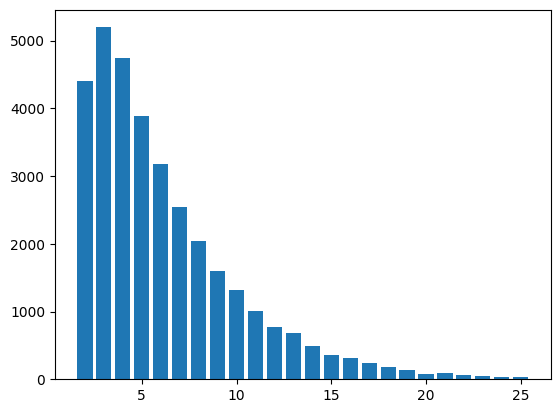

In [7]:
grade_distribution = defaultdict(GradeDist)
for candidate in dict_candidates:
    grade_distribution[dict_candidates[candidate].points].add(candidate)

plt.bar(grade_distribution.keys(), [grade_distribution[key].count for key in grade_distribution.keys()])

In [8]:
print("Points \t: \tNumber of candidates \t: \tTop n% of candidates")
print("------ \t: \t--------------------- \t: \t--------------------")
for key in sorted(grade_distribution.keys(), reverse=True):
    print(f"{key}\t: \t\t{grade_distribution[key]} \t\t: \t\t{top_n_percent(grade_distribution, key):.2f}%")

Points 	: 	Number of candidates 	: 	Top n% of candidates
------ 	: 	--------------------- 	: 	--------------------
25	: 		30 		: 		0.09%
24	: 		31 		: 		0.18%
23	: 		47 		: 		0.32%
22	: 		69 		: 		0.53%
21	: 		88 		: 		0.79%
20	: 		85 		: 		1.05%
19	: 		132 		: 		1.44%
18	: 		178 		: 		1.98%
17	: 		233 		: 		2.67%
16	: 		314 		: 		3.61%
15	: 		362 		: 		4.70%
14	: 		488 		: 		6.16%
13	: 		680 		: 		8.19%
12	: 		772 		: 		10.50%
11	: 		1004 		: 		13.51%
10	: 		1316 		: 		17.44%
9	: 		1593 		: 		22.21%
8	: 		2040 		: 		28.32%
7	: 		2544 		: 		35.93%
6	: 		3179 		: 		45.44%
5	: 		3886 		: 		57.07%
4	: 		4742 		: 		71.26%
3	: 		5196 		: 		86.81%
2	: 		4406 		: 		100.00%


In [9]:
## All 25 points candidates

print(f"Total {grade_distribution[25].count} candidates with 25 points")
print(f"Candidates with 25 points(top {top_n_percent(grade_distribution, 25):.2f}%):")
for candidate in grade_distribution[25].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 30 candidates with 25 points
Candidates with 25 points(top 0.09%):
	 FRANK EMMANUEL OROK TABI       	 25 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 MBATU ESELAKWE BRAIN ATEFOR    	 25 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 NFON DAVIS VOMA                	 25 points -> {'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'PHY': 'A', 'PMM': 'A'}
	 NFOR GLEN YINYU                	 25 points -> {'CHE': 'A', 'CSC': 'A', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 JEFFERSON CLINTON YOUASHI      	 25 points -> {'CHE': 'A', 'CSC': 'A', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 SOYANG THIERRY NGONG           	 25 points -> {'CHE': 'A', 'CSC': 'A', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 KONGYU FAVOUR NGWA             	 25 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 KENGNE MUKEM DIVINE DARYL      	 25 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 NFOR RACHEAL YURI              	 25 points -> {'BIO':

In [10]:
## All 24 points candidates

print(f"Total {grade_distribution[24].count} candidates with 24 points")
print(f"Candidates with 24 points(top {top_n_percent(grade_distribution, 24):.2f}%):")
for candidate in grade_distribution[24].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 31 candidates with 24 points
Candidates with 24 points(top 0.18%):
	 NSIELA SUHBISI DENZEL          	 24 points -> {'CHE': 'A', 'CSC': 'A', 'FMA': 'A', 'PHY': 'B', 'PMM': 'A'}
	 OBEN AKO NEYEIT LASCONI        	 24 points -> {'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'PHY': 'A', 'PMM': 'B'}
	 NGWA BIH MARION                	 24 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'B', 'PMM': 'A'}
	 AZANG DESMOND KUM              	 24 points -> {'BIO': 'A', 'CHE': 'A', 'CSC': 'B', 'PHY': 'A', 'PMM': 'A'}
	 TSI RYAN ANYE ABEGLEY          	 24 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'B', 'PMM': 'A'}
	 KONGNYUY RAYMOND AFONI         	 24 points -> {'CHE': 'A', 'CSC': 'B', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 MBIAKOP KUITCHA DARINA         	 24 points -> {'CHE': 'A', 'CSC': 'A', 'FMA': 'A', 'PHY': 'B', 'PMM': 'A'}
	 TCHETTA KANOUO FRANK RODEL     	 24 points -> {'CHE': 'A', 'CSC': 'A', 'FMA': 'B', 'PHY': 'A', 'PMM': 'A'}
	 LANTUM LYDIA DZEENYUY          	 24 points -> {'BIO':

In [11]:
## All 23 points candidates

print(f"Total {grade_distribution[23].count} candidates with 23 points")
print(f"Candidates with 23 points(top {top_n_percent(grade_distribution, 23):.2f}%):")
for candidate in grade_distribution[23].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 47 candidates with 23 points
Candidates with 23 points(top 0.32%):
	 JENNA EBOT AGBOR               	 23 points -> {'BIO': 'A', 'CHE': 'A', 'CSC': 'B', 'PHY': 'A', 'PMM': 'B'}
	 TAKEM JIM RAWLINGS EYONGAROH   	 23 points -> {'CHE': 'A', 'FMA': 'A', 'ICT': 'C', 'PHY': 'A', 'PMM': 'A'}
	 WAYIH RAISSA AWACHWI           	 23 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'C', 'PMM': 'A'}
	 NTAH AJONG MARY ANNE CHUINDOH  	 23 points -> {'BIO': 'A', 'CHE': 'A', 'CSC': 'B', 'PHY': 'B', 'PMM': 'A'}
	 ENOW JOSEPHINE AYUKNWEN        	 23 points -> {'CHE': 'A', 'CSC': 'B', 'FMA': 'B', 'PHY': 'A', 'PMM': 'A'}
	 MASANGA RUSSELL ANONG          	 23 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'B', 'PHY': 'A', 'PMM': 'A'}
	 LONTSI LANDO ANGE BIENVENU     	 23 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'C', 'PMM': 'A'}
	 KAMDEM KAMGAING LIONEL WILFRIE 	 23 points -> {'CHE': 'A', 'CSC': 'B', 'FMA': 'A', 'PHY': 'B', 'PMM': 'A'}
	 FONCHAM KENA DORINE            	 23 points -> {'BIO':

In [12]:
## All 22 points candidates

print(f"Total {grade_distribution[22].count} candidates with 22 points")
print(f"Candidates with 22 points(top {top_n_percent(grade_distribution, 22):.2f}%):")
for candidate in grade_distribution[22].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 69 candidates with 22 points
Candidates with 22 points(top 0.53%):
	 MARK CARRINGTON CHEI           	 22 points -> {'CHE': 'B', 'CSC': 'B', 'FMA': 'A', 'PHY': 'B', 'PMM': 'A'}
	 TENDONGFOR PRESLY NOBUDEM TENK 	 22 points -> {'BIO': 'A', 'CHE': 'A', 'CSC': 'B', 'PHY': 'B', 'PMM': 'B'}
	 IHIMBRU ZADOLF ONGUM           	 22 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'B', 'PHY': 'B', 'PMM': 'A'}
	 TANTOH GILEAN TAMANJI          	 22 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'B', 'PHY': 'C', 'PMM': 'A'}
	 PIRES NKEH FONJUNGO            	 22 points -> {'ECO': 'A', 'GEO': 'A', 'ICT': 'A', 'PMS': 'D', 'REL': 'A'}
	 NEBA NADINE MANKAA             	 22 points -> {'ECO': 'A', 'ENG': 'D', 'GEO': 'A', 'ICT': 'A', 'PMS': 'A'}
	 AFANYU CALEB SHEY              	 22 points -> {'BIO': 'A', 'CHE': 'B', 'CSC': 'B', 'PHY': 'B', 'PMM': 'A'}
	 FONDOP SELAM ABIGAIL PRISCILLE 	 22 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'B', 'PHY': 'C', 'PMM': 'A'}
	 EKPOMBANG TABENDANG            	 22 points -> {'BIO':

In [13]:
## All 21 points candidates

print(f"Total {grade_distribution[21].count} candidates with 21 points")
print(f"Candidates with 21 points(top {top_n_percent(grade_distribution, 21):.2f}%):")
for candidate in grade_distribution[21].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 88 candidates with 21 points
Candidates with 21 points(top 0.79%):
	 MELINGUI NDIENGWASA DANIELLA E 	 21 points -> {'BIO': 'B', 'CHE': 'B', 'FMA': 'A', 'PHY': 'C', 'PMM': 'A'}
	 FONJI DANIEL KUKUH             	 21 points -> {'BIO': 'B', 'CHE': 'B', 'FMA': 'B', 'PHY': 'B', 'PMM': 'A'}
	 TATAH HENRY EBUNE DZELAMONYUY  	 21 points -> {'BIO': 'B', 'CHE': 'A', 'FMA': 'A', 'PHY': 'C', 'PMM': 'B'}
	 MWAMBO LENNA EKEMA             	 21 points -> {'ECO': 'A', 'GEO': 'C', 'HIS': 'B', 'PHI': 'B', 'REL': 'A'}
	 DERUDES EPAH FONKA KAISER      	 21 points -> {'ECO': 'A', 'GEO': 'B', 'ICT': 'B', 'PMS': 'C', 'REL': 'A'}
	 LOBBE JOSHUA                   	 21 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'B', 'PHY': 'C', 'PMM': 'A'}
	 ETIENDEM BETRAND ALEMNJI       	 21 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'B', 'PHY': 'C', 'PMM': 'B'}
	 MUNDU WENDY ENDAM              	 21 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'B', 'PHY': 'C', 'PMM': 'A'}
	 PHYLLIS SAAH AWAHSUH           	 21 points -> {'BIO':

In [14]:
## All 20 points candidates

print(f"Total {grade_distribution[20].count} candidates with 20 points")
print(f"Candidates with 20 points(top {top_n_percent(grade_distribution, 20):.2f}%):")
for candidate in grade_distribution[20].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 85 candidates with 20 points
Candidates with 20 points(top 1.05%):
	 AJECHA NJINGO LARRY STEVE      	 20 points -> {'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'PHY': 'C', 'PMM': 'C'}
	 SIMON NGWONJU                  	 20 points -> {'BIO': 'A', 'CHE': 'B', 'CSC': 'B', 'PHY': 'C', 'PMM': 'B'}
	 FONKONYI AMOS MBIFORNYI        	 20 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'B', 'PHY': 'C', 'PMM': 'B'}
	 NYANDO ONONGWENE               	 20 points -> {'BIO': 'B', 'CHE': 'B', 'FMA': 'B', 'PHY': 'C', 'PMM': 'A'}
	 TEBOH TORI ANIM                	 20 points -> {'BIO': 'B', 'CHE': 'B', 'ICT': 'A', 'PHY': 'D', 'PMS': 'A'}
	 BIH ELISE AMBE                 	 20 points -> {'BIO': 'A', 'CHE': 'B', 'ICT': 'B', 'PHY': 'D', 'PMS': 'A'}
	 TANJONG MARIVONE NGEFOR        	 20 points -> {'ECO': 'A', 'ENG': 'D', 'GEO': 'B', 'PMS': 'B', 'REL': 'A'}
	 NSOM NEVILLE ANKIAMBOM         	 20 points -> {'BIO': 'A', 'CHE': 'A', 'CSC': 'D', 'PHY': 'B', 'PMM': 'B'}
	 PIEUMI DJAMPOU JOEL LAGRACE    	 20 points -> {'BIO':

In [15]:
## All 19 points candidates

print(f"Total {grade_distribution[19].count} candidates with 19 points")
print(f"Candidates with 19 points(top {top_n_percent(grade_distribution, 19):.2f}%):")
for candidate in grade_distribution[19].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 132 candidates with 19 points
Candidates with 19 points(top 1.44%):
	 DESIDERIO BOI FUH SUH          	 19 points -> {'CHE': 'B', 'CSC': 'B', 'FMA': 'B', 'PHY': 'D', 'PMM': 'A'}
	 ZIH PAUL AKIY                  	 19 points -> {'ENG': 'C', 'FRE': 'A', 'HIS': 'B', 'LIT': 'D', 'PHI': 'A'}
	 AGEBOH NKENGAFAC               	 19 points -> {'BIO': 'A', 'CHE': 'C', 'FMA': 'B', 'PHY': 'C', 'PMM': 'B'}
	 LESLIE NFORSI                  	 19 points -> {'ECO': 'C', 'GEO': 'B', 'ICT': 'A', 'PMS': 'D', 'REL': 'A'}
	 HAPSATU NASIRU                 	 19 points -> {'CHE': 'B', 'FMA': 'B', 'ICT': 'B', 'PHY': 'D', 'PMM': 'A'}
	 SANTINA EJECK CHIFOR           	 19 points -> {'BIO': 'C', 'CHE': 'A', 'FMA': 'B', 'PHY': 'D', 'PMM': 'A'}
	 SIRRI                          	 19 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'B', 'PHY': 'D', 'PMM': 'B'}
	 MBISEH BRONLY AZINUI           	 19 points -> {'BIO': 'A', 'CHE': 'A', 'CSC': 'E', 'PHY': 'C', 'PMM': 'A'}
	 BANTEH BLAISE BERINYUY         	 19 points -> {'BIO'